<a href="https://colab.research.google.com/github/sgarad012/Hotel-data/blob/main/Hotel_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
data=pd.read_csv('/content/Hotel Bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.shape

(119390, 32)

In [7]:
data.value_counts()

hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  company  days_in_waiting_list  customer_type    adr     required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    0            256        2016               October             43                        16                         2                        3                     2       0.0       0       BB    DEU      Online TA       TA/TO                 0                  0                       0                               A                   A                   0                No Deposit    9.0    333.0    0                

In [8]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
data.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [11]:
data.isnull().all()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


## Chart-1

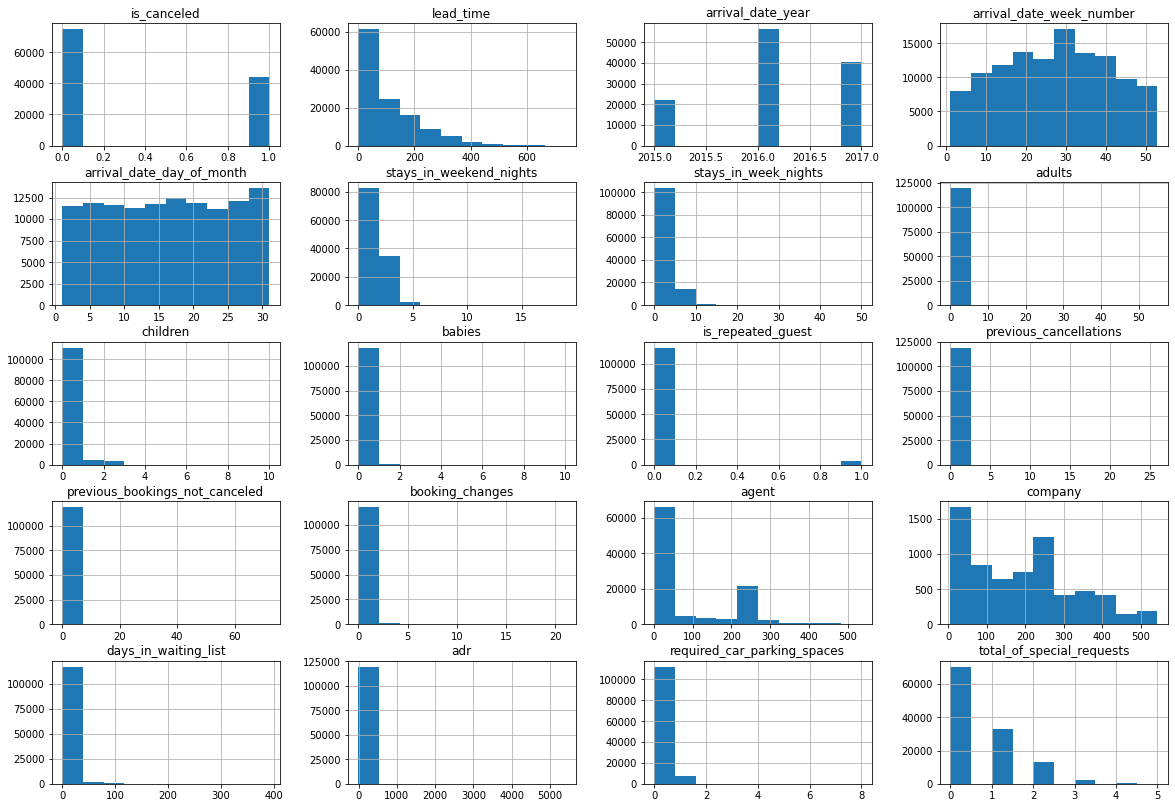

In [12]:
data.hist(figsize=(20,14))
plt.show()

- Why did you pick the specific chart?

visiulaize some important variables 

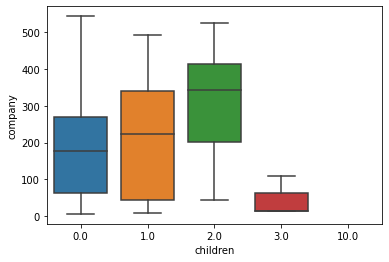

In [13]:
sns.boxplot(x='children', y='company', data=data)


In [14]:
data['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

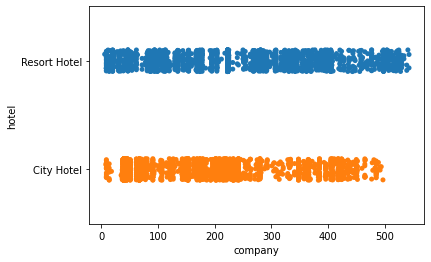

In [15]:
sns.stripplot(x='company', y='hotel', data=data)

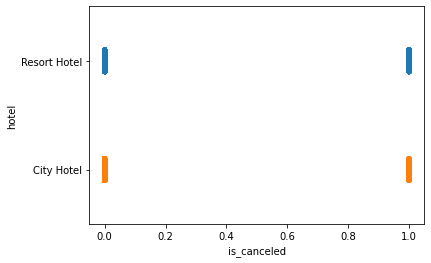

In [16]:
sns.stripplot(x='is_canceled', y='hotel', data=data)



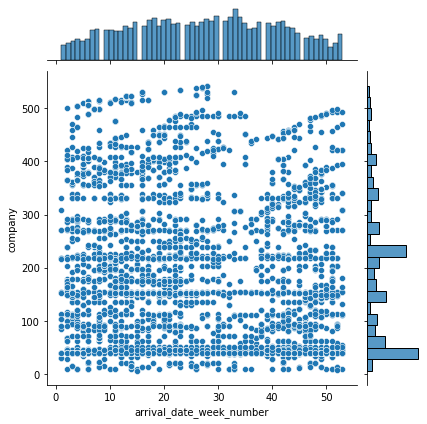

In [17]:
sns.jointplot(x='arrival_date_week_number', y='company', data=data)

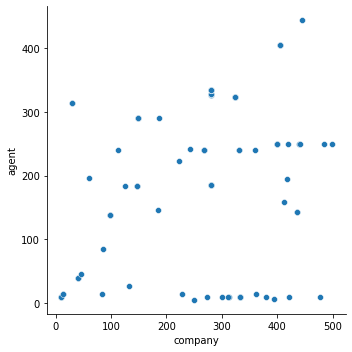

In [18]:
sns.relplot(x='company',y='agent',data=data)

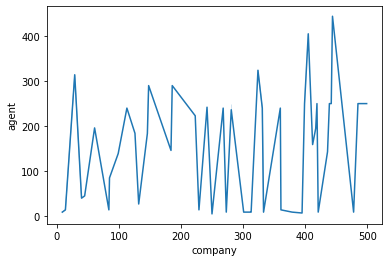

In [19]:
sns.lineplot(x='company',y='agent',data=data)

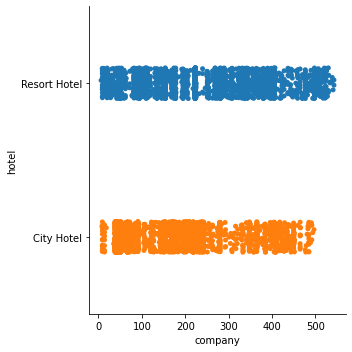

In [20]:
sns.catplot(x='company',y='hotel',data=data)

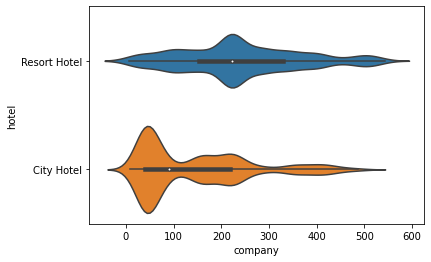

In [21]:
sns.violinplot(x='company',y='hotel',data=data)

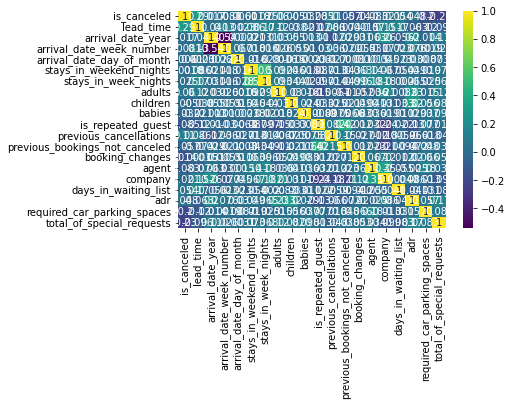

In [22]:
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

In [23]:
data1=data.groupby(['hotel','country', 'is_canceled'])
data1.first()

lead_time  arrival_date_year  \
hotel        country is_canceled                                 
City Hotel   ABW     0                   45               2016   
             AGO     0                    2               2015   
                     1                    3               2016   
             AIA     0                    0               2016   
             ALB     0                    3               2015   
...                                     ...                ...   
Resort Hotel VNM     0                   21               2016   
             ZAF     0                   31               2015   
                     1                   12               2016   
             ZMB     0                   96               2015   
             ZWE     0                   15               2015   

                                 arrival_date_month  arrival_date_week_number  \
hotel        country is_canceled                                                
City Hotel   ABW     0                         June                        27   
             AGO     0                       August                        32   
                     1                      January                         2   
             AIA     0                         July                        28   
             ALB     0                     December                        51   
...                                             ...                       ...   
Resort Hotel VNM     0                         July                        28   
             ZAF     0                      October                        41   
                     1                       August                        33   
             ZMB     0                      October                        43   
             ZWE     0                     November                        45   

                                  arrival_date_day_of_month  \
hotel        country is_canceled                              
City Hotel   ABW     0                                   27   
             AGO     0                                    2   
                     1                                    9   
             AIA     0                                    8   
             ALB     0                                   18   
...                                                     ...   
Resort Hotel VNM     0                                    8   
             ZAF     0                                    6   
                     1                                   11   
             ZMB     0                                   24   
             ZWE     0                                    6   

                                  stays_in_weekend_nights  \
hotel        country is_canceled                            
City Hotel   ABW     0                                  1   
             AGO     0                                  1   
                     1                                  1   
             AIA     0                                  2   
             ALB     0                                  0   
...                                                   ...   
Resort Hotel VNM     0                                  0   
             ZAF     0                                  1   
                     1                                  0   
             ZMB     0                                  2   
             ZWE     0                                  0   

                                  stays_in_week_nights  adults  children  \
hotel        country is_canceled                                           
City Hotel   ABW     0                               3       3       0.0   
             AGO     0                               0       1       0.0   
                     1                               1       2       0.0   
             AIA     0                               2       2       2.0   
             ALB     0                             

In [ ]:
dtype_before = type(data["is_canceled"])
is_canceled_list = data["is_canceled"].tolist()
dtype_after = type(is_canceled_list)

is_canceled_list

In [25]:
def most_frequent(is_canceled_list):
    counter = 0
    num = is_canceled_list[0]
     
    for i in is_canceled_list:
        curr_frequency = is_canceled_list.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

Booking=(most_frequent(is_canceled_list))
print(f" Most Frequent Analaysis: 0 for Not cancelled & 1 for cancelled {Booking}")

 Most Frequent Analaysis: 0 for Not cancelled & 1 for cancelled 0


In [26]:
data2=data.groupby(['hotel', 'required_car_parking_spaces'])
data2.first()

is_canceled  lead_time  \
hotel        required_car_parking_spaces                           
City Hotel   0                                      0          6   
             1                                      0        126   
             2                                      0        278   
             3                                      0         13   
Resort Hotel 0                                      0        342   
             1                                      0         78   
             2                                      0         44   
             3                                      0        205   
             8                                      0         26   

                                          arrival_date_year  \
hotel        required_car_parking_spaces                      
City Hotel   0                                         2015   
             1                                         2015   
             2                                         2016   
             3                                         2016   
Resort Hotel 0                                         2015   
             1                                         2015   
             2                                         2015   
             3                                         2017   
             8                                         2017   

                                         arrival_date_month  \
hotel        required_car_parking_spaces                      
City Hotel   0                                         July   
             1                                         July   
             2                                         July   
             3                                     December   
Resort Hotel 0                                         July   
             1                                         July   
             2                                         July   
             3                                         June   
             8                                        March   

                                          arrival_date_week_number  \
hotel        required_car_parking_spaces                             
City Hotel   0                                                  27   
             1                                                  31   
             2                                                  30   
             3                                                  50   
Resort Hotel 0                                                  27   
             1                                                  27   
             2                                                  28   
             3                                                  26   
             8                                                  11   

                                          arrival_date_day_of_month  \
hotel        required_car_parking_spaces                              
City Hotel   0                                                    1   
             1                                                   27   
             2                                                   23   
             3                                                    5   
Resort Hotel 0                                                    1   
             1                                                    1   
             2                                                    5   
             3                                                   26   
             8                                                   14   

                                          stays_in_weekend_nights  \
hotel        required_car_parking_spaces                            
City Hotel   0                                                  0   
             1                                                  1   
             2                                                  2   
       

In [27]:
data3=data.groupby(['hotel', 'is_canceled'])
data3.first()

lead_time  arrival_date_year arrival_date_month  \
hotel        is_canceled                                                    
City Hotel   0                    6               2015               July   
             1                   88               2015               July   
Resort Hotel 0                  342               2015               July   
             1                   85               2015               July   

                          arrival_date_week_number  arrival_date_day_of_month  \
hotel        is_canceled                                                        
City Hotel   0                                  27                          1   
             1                                  27                          1   
Resort Hotel 0                                  27                          1   
             1                                  27                          1   

                          stays_in_weekend_nights  stays_in_week_nights  \
hotel        is_canceled                                                  
City Hotel   0                                  0                     2   
             1                                  0                     4   
Resort Hotel 0                                  0                     0   
             1                                  0                     3   

                          adults  children  babies  ... deposit_type  agent  \
hotel        is_canceled                            ...                       
City Hotel   0                 1       0.0       0  ...   No Deposit    6.0   
             1                 2       0.0       0  ...   No Deposit    9.0   
Resort Hotel 0                 2       0.0       0  ...   No Deposit  304.0   
             1                 2       0.0       0  ...   No Deposit  240.0   

                         company days_in_waiting_list  customer_type   adr  \
hotel        is_canceled                                                     
City Hotel   0              40.0                    0      Transient   0.0   
             1              40.0                    0      Transient  76.5   
Resort Hotel 0             110.0                    0      Transient   0.0   
             1             110.0                    0      Transient  82.0   

                          required_car_parking_spaces  \
hotel        is_canceled                                
City Hotel   0                                      0   
             1                                      0   
Resort Hotel 0                                      0   
             1                                      0   

                         total_of_special_requests reservation_status  \
hotel        is_canceled                                                
City Hotel   0                                   0          Check-Out   
             1                                   1           Canceled   
Resort Hotel 0                                   0          Check-Out   
             1                                   1           Canceled   

                          reservation_status_date  
hotel        is_canceled                           
City Hotel   0                         2015-07-03  
             1                         2015-07-01  
Resort Hotel 0                         2015-07-01  
             1                         2015-05-06  

[4 rows x 30 columns]

In [28]:
df2 = pd.DataFrame([data.hotel, data.is_canceled]).transpose()
print(df2)

               hotel is_canceled
0       Resort Hotel           0
1       Resort Hotel           0
2       Resort Hotel           0
3       Resort Hotel           0
4       Resort Hotel           0
...              ...         ...
119385    City Hotel           0
119386    City Hotel           0
119387    City Hotel           0
119388    City Hotel           0
119389    City Hotel           0

[119390 rows x 2 columns]


In [29]:
data2=df2.groupby(['hotel', 'is_canceled'])
data2.first()

Empty DataFrame
Columns: []
Index: [(City Hotel, 0), (City Hotel, 1), (Resort Hotel, 0), (Resort Hotel, 1)]

In [30]:
ch = df2.loc[df2["hotel"] == "City Hotel"]
ch

,hotel,is_canceled
40060,City Hotel,0
40061,City Hotel,1
40062,City Hotel,1
40063,City Hotel,1
40064,City Hotel,1
...,...,...
119385,City Hotel,0
119386,City Hotel,0
119387,City Hotel,0
119388,City Hotel,0


In [31]:
options=[1]
rslt_df = ch[(ch['hotel'] == "City Hotel") &
          ch['is_canceled'].isin(options)]
rslt_df

,hotel,is_canceled
40061,City Hotel,1
40062,City Hotel,1
40063,City Hotel,1
40064,City Hotel,1
40065,City Hotel,1
...,...,...
110280,City Hotel,1
111355,City Hotel,1
111924,City Hotel,1
111925,City Hotel,1


In [32]:
ch_count=rslt_df["is_canceled"].count()
ch_count

33102

In [33]:
rh = df2.loc[df2["hotel"] == "Resort Hotel"]
rh

,hotel,is_canceled
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0
...,...,...
40055,Resort Hotel,0
40056,Resort Hotel,0
40057,Resort Hotel,0
40058,Resort Hotel,0


In [34]:
options=[1]
rslt_rh = rh[(rh['hotel'] == "Resort Hotel") &
          rh['is_canceled'].isin(options)]
rslt_rh

,hotel,is_canceled
8,Resort Hotel,1
9,Resort Hotel,1
10,Resort Hotel,1
27,Resort Hotel,1
32,Resort Hotel,1
...,...,...
32682,Resort Hotel,1
32684,Resort Hotel,1
32835,Resort Hotel,1
34707,Resort Hotel,1


In [35]:
rh_count=rslt_rh["is_canceled"].count()
rh_count

11122

# which Hotel have more cancelled booking.


In [36]:
if (ch_count >= rh_count):
  print("City hotel are more number of cancelled booking")
else:
  print("Resort hotel has more number of cancelled booking")

City hotel are more number of cancelled booking


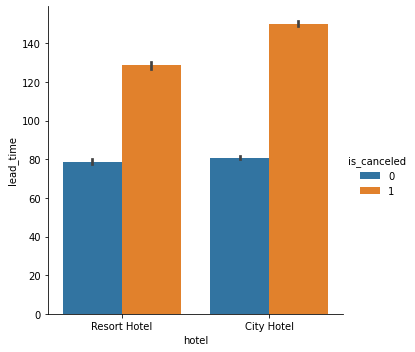

In [37]:
sns.catplot(data=data, x="hotel", y="lead_time", hue="is_canceled", kind="bar")

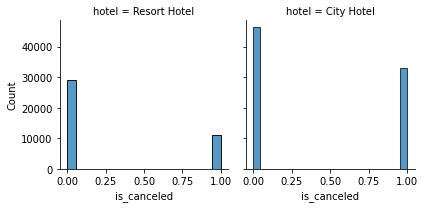

In [38]:
g = sns.FacetGrid(data, col="hotel")
g.map(sns.histplot, "is_canceled")

# Booking more on week days or weekend days?


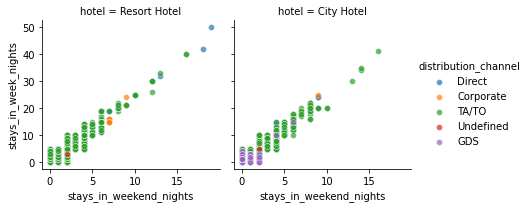

In [39]:
g = sns.FacetGrid(data, col="hotel", hue="distribution_channel")
g.map(sns.scatterplot, "stays_in_weekend_nights", "stays_in_week_nights", alpha=.7)
g.add_legend()

In [40]:
df3 = pd.DataFrame([data.hotel, data.stays_in_weekend_nights, data.stays_in_week_nights]).transpose()
print(df3)

               hotel stays_in_weekend_nights stays_in_week_nights
0       Resort Hotel                       0                    0
1       Resort Hotel                       0                    0
2       Resort Hotel                       0                    1
3       Resort Hotel                       0                    1
4       Resort Hotel                       0                    2
...              ...                     ...                  ...
119385    City Hotel                       2                    5
119386    City Hotel                       2                    5
119387    City Hotel                       2                    5
119388    City Hotel                       2                    5
119389    City Hotel                       2                    7

[119390 rows x 3 columns]


In [41]:
stay_week=df3["stays_in_week_nights"].sum()
stay_weekend=df3["stays_in_weekend_nights"].sum()

if ( stay_week >=stay_weekend):
  print("Booking are more on week days")
else:
  print("Booking are more on weekend")

Booking are more on week days


In [42]:
df3["stays_in_weekend_nights"].sum()

110746

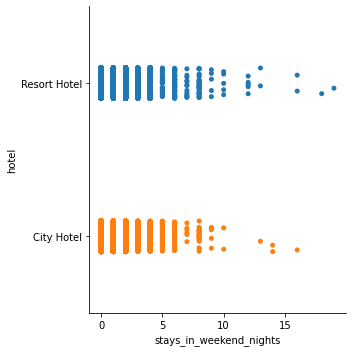

In [43]:
sns.catplot(x='stays_in_weekend_nights',y='hotel',data=data)

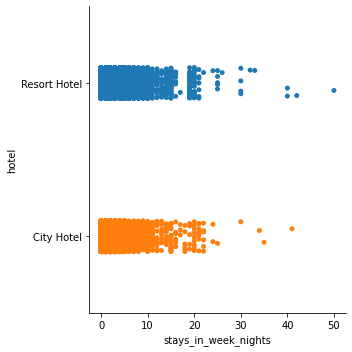

In [44]:
sns.catplot(x='stays_in_week_nights',y='hotel',data=data)

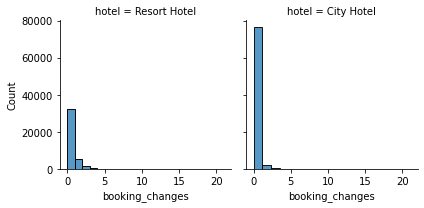

In [45]:
g = sns.FacetGrid(data, col="hotel")
g.map(sns.histplot, "booking_changes")

In [46]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'Graph showing number of arrivals per year')

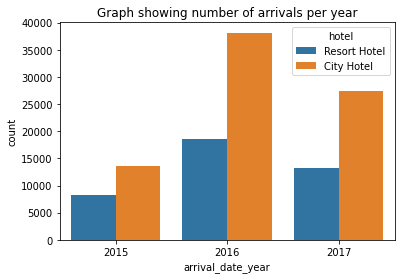

In [47]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
period_arrival = data[lst3]

sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel').set_title('Graph showing number of arrivals per year')

Text(0.5, 1.0, 'Number of stays on weekend nights')

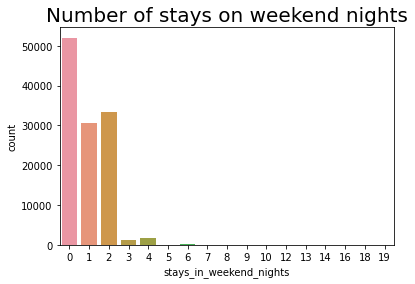

In [48]:
sns.countplot(data = data, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

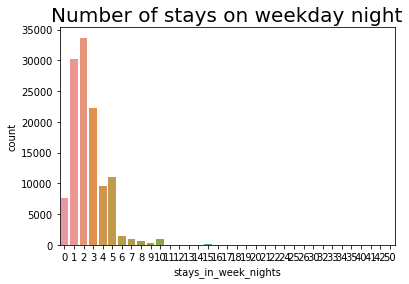

In [49]:
sns.countplot(data = data, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize =20 )

Text(0.5, 1.0, 'Number of adults')

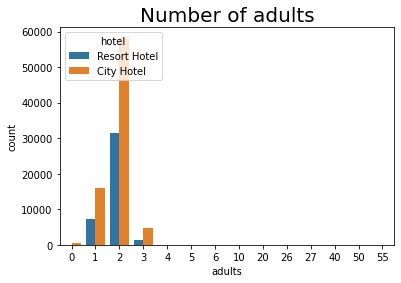

In [50]:
sns.countplot(data = data, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

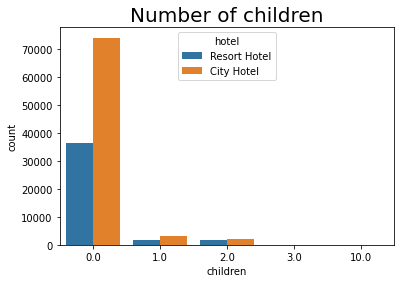

In [51]:
sns.countplot(data = data, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

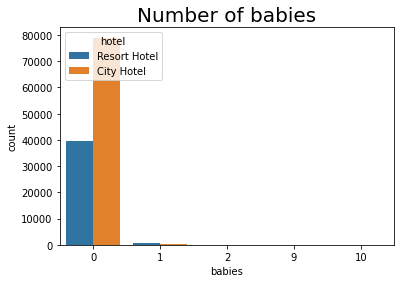

In [52]:
sns.countplot(data = data, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

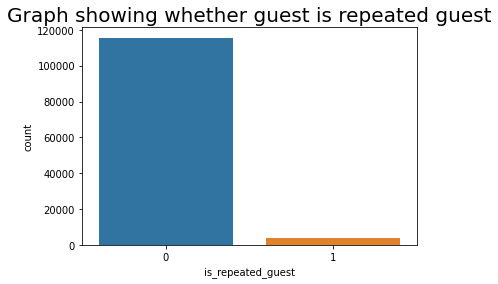

In [53]:
sns.countplot(data = data, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

Text(0.5, 1.0, 'Graph showing type of guest')

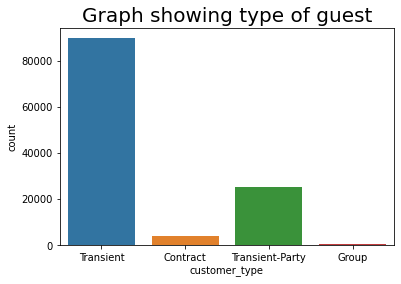

In [54]:
sns.countplot(data = data, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

In [55]:

country_visitors = data[data['is_canceled'] == 0].groupby(['country']).size().reset_index(name = 'count')



px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Visitors Across the country")

<ipython-input-56-4be6d03b1219>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



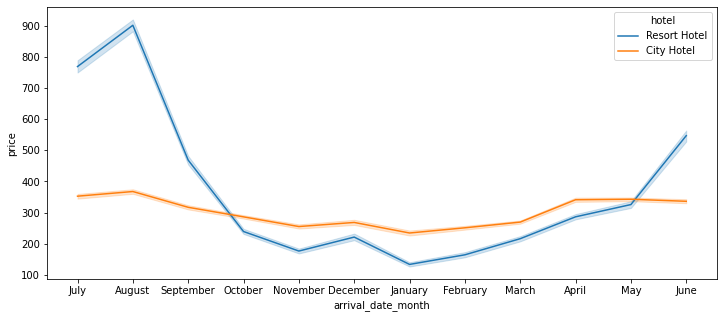

In [56]:
#graphing prices per month per hotel
#average daily rate = (sumOfAllLodgingTransaction/TotalNumberOfStayingNight)
#average daily rate per person = (ADR/Adults+Children)

# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']) 
actual_guests = data.loc[data["is_canceled"] == 0]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

### Conclusion




- City hotels account for 2/3s of all bookings, Resort hotels account for 1/3.

- About 50% of all bookings are cancelled.

- 2016 showed the highest rate of hotel bookings. (data from 2015-2017)

- Highest daily rates occurred in the summer (June, July, August)

- More bookings occured on weekdays vs weekends.

- Bookers with children or babies booked at resorts at a higher rate.

- UK, France, and Portugal booked the most hotel stays worldwide.

- Majority of hotel bookings did not require a deposit.

- Most bookings came from independent, transient customers.

- 90% of bookings were not return guests.

### What do you suggest the client to achieve Business Objective ?

Analysis of this dataset highlights a few key take-aways. First, there is a disproportianate amount of cancellations on hotel bookings. Bookers are not required to send in a deposit in most bookings which could explain the high rate of cancellations. There are more bookings on weekdays, this data suggests that hotel business could be improved by targeting working travelers or improving daily rates for weekdays. Although resorts only account for 1/3 of all bookings, they out-compete city hotels when there is a baby in the booking group. Resort hotels could target young families with this knowledge by appealing to customers looking for a safe, family atmosphere. Europe has a high amount of travelers that book both resort and city hotels. European business typically has more holiday vacation time for workers and aggressive marketing campaigns could be made in this region to corner this market. Resort hotels have a steep rise in price during busy summer seasons, knowing this information city hotels would potentially raise their daily rate. Lastly, most bookings came from independent travelers and there is a significantly low rate of return . Hotels should take efforts to improve relationships with customers or target past guests for return stays.